# Numpy 数组及操作入门

Numpy 是 Numerical Python 的简称, 它是目前 Python 数值计算中最为重要的基础软件包. 大多数 Python 大数据和科学计算软件包都提供了基于 Numpy 的计算函数功能, 并将 Numpy 的数组对象作为数据交换的通用形式.

* https://numpy.org/

导入 Numpy 模块的的语句如下:

In [2]:
import numpy as np
print(np.__version__)

1.16.3


## Python 内置数据结构存在的问题

Python 是一种解释性的动态类型语言, 可自动化进行程序内存的分配和回收. 这大大减轻了用户编程的负担, 并带来了极大的编程灵活性. 

但往往鱼和熊掌不可兼得！

![Integer Memory Layout](figures/fish-bear.jpg)

### C 和 Python 的不同



```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```



```python
# Python code
result = 0
for i in range(100):
    result += i
```

* Python 是一种动态类型的语言. 
* C 是一种静态类型的语言, 变量类型确定后就不能再改变。

Python 可以这样写:

```python
# Python code
x = 4
x = "four"
```

但在 C 中, 下面类似的家法是错误的!

```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

### Python 中的整数不仅仅是一个整数

标准的 Python 是由 C 语言实现的, 它的整数对象除了要表示的整数, 还存储了很多其它信息, 它的具体实现代码如下.

```C
struct _longobject {
    long ob_refcnt; // 引用计数器, 辅且 Python 解释器分配和回收内存.
    PyTypeObject *ob_type; // 变量类型.
    size_t ob_size; // 数组 ob_digit 的长度
    long ob_digit[1]; // Python 变量实际表示的整数
};
```

![Integer Memory Layout](figures/cint_vs_pyint.png)

### Python 中的列表与 Numpy 数组

In [6]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])# 建立一个长度为　８　的数组
l = [1, 2, 3 ,4, 5, 6, 7, 8]

![Array Memory Layout](figures/array_vs_list.png)

Python 列表对象和 Numpy 数组对象有不同之处是什么?

* Numpy 数组对象包含了一个指向一块连续内存的指针, 数据就存储在这块内存中. 数据的类型信息包含在数组的属性中. 这样**不灵活**, 但数据的存储和操作更高效.
* Python 列表对象包含一组指针, 每个指针又指向一个 Python 的对象, 这些对象又各自包含自己的数据和类型信息, 这样带来极大的**灵活性**, 但在数据存储和操作上**损失了效率**.

**注意：**
* 事物的尺度和规模
* 不同尺度和规模下，理解处理问题的策略和方法都会不同．

## 多维数组对象

Numpy 提供一个多维数组对象 `ndarray`, 它是同种类型数据的一个有序集合。下面给出一个 Numpy 数组的创建示例：用 Python 列表来创建数组。

In [1]:
import numpy as np # 导入 numpy 
a = np.array([[0, 1], [2, 3]]) # 创建一个二维数组
print("a 的对象类型为：", type(a)) # 打印变量 a 指向的对象类型
a

a 的对象类型为： <class 'numpy.ndarray'>


array([[0, 1],
       [2, 3]])

* 计算机内存是一个线性结构(画图说明)
* 那么多维数组对象 `ndarray` 中的数据，在内存中是如何存储的？
* 要实现数组中元素的访问和操作， `ndarray` 应该有什么样的属性？

在计算机内存中， 上面的二维数组 `a` 是以一行接一行的方式存储在一块连续的内存当中，这种存储方式称为**行优先(row-major)** 存储。

In [40]:
' '.join(str(x) for x in a.flat)

'0 1 2 3'

**Python知识扩展：生成器(generator)表达式**

In [41]:
gen = (x**2 for x in range(10))
type(gen)

generator

生成器表达式可以做为函数参数使用。

In [39]:
sum(x**2 for x in range(100))

328350

In [38]:
dict((i, i**2) for i in range(5))

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

### 多维数组的数据类型

多维数组是用来存储同种类型数据的，同种类型的数据占用内存的大小是固定的。 多维数组中的数据类型规定了数组中每个数据占用内存的大小。

|类型| 类型代码 | 描述 |
|:--| :-- |:--|
|int8,   uint8| i1, u1 | 有符号和无符号的 8 位整数
|int16, uint16| i2, u2 | 有符号和无符号的 16 位整数
|int32, uint32| i4, u4 | 有符号和无符号的 32 位整数
|int64, uint64| i8, u8 | 有符号和无符号的 64 位整数
|int,     uint|        | 有符号和无符号的 64 位整数
|float16      | f2     | 半浮点精度
|float32      | f4或 f  | 标准单浮点精度， 兼容 C 语言 float
|float64      | f8或 d  | 标准双浮点精度， 兼容 C 语言 double 和 Python float
|float128     | f16或 g | 拓展精度浮点数
|complex64     | c8     |  基于 32 位浮点数的复数
|complex128    | c16     |  基于 64 位浮点数的复数
|complex256    | c32     |  基于 128 位浮点数的复数
|bool          | ?       |  布尔值，存储 True 或 False
|oject        | o       |  Python object 类型
|string       | S       | 修正的 ASC II 字符串类型， 例如 `S10` 表示长度为 10 的字符串类型
|unicode_     | U       | 修正的 Unicode 类型，例如 `U10` 表示一个长度为 10 Unicode 类型

In [2]:
import numpy as np
a = np.array([0, 1], dtype='?')
print(a)
print(a.dtype)

[False  True]
bool


In [6]:
b = np.array([3, 4], dtype=np.float)
print(b)
print(b.dtype)

[3. 4.]
float64


### 多维数组的轴(axis) 

轴 (axis) 是 Numpy 多维数组对象涉及到的一个重要概念。 

* 1 维数组有 1 个轴， 2 维数组有两个轴， n 维数组有 n 个轴, 即数组有 n 个轴就是 n 维数组。
* 数组的轴是有顺序的，编号从 0 开始。
* 数组的每一轴都是有长度的。

![](./figures/axis.jpg)

下面创建一个一维数组 `a`
* 只包含一个轴， 
* `axis=0` 轴的长度为 3

In [5]:
import numpy as np
a = np.array([1, 2, 3], dtype=np.int)
a

array([1, 2, 3])

下面创建一个二维数组 `b`

* 包含两个轴
* `axis=0` 轴的长度为 2
* `axis=1` 轴的长度为 3

In [4]:
b = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int)
print(b)
print(b[0, 1])
print(b[1, 2])

[[1 2 3]
 [4 5 6]]
2
6


 下在创建一个三维数组 `c`
 
 * 包含 3 个轴
 * `axis=0` 的长度为 4
 * `axis=1` 的长度为 2
 * `axis=2` 的长度为 3

**注：**
    1. 画图理解 b 在内存中的存储

In [3]:
c = np.array([
    [[1, 2, 3], [4, 5, 6]], 
    [[7, 8, 9], [10, 11, 12]],
    [[13, 14, 15], [16, 17, 18]],
    [[19, 20, 21], [22, 23, 24]]], dtype=np.int)
c

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24]]])

**注：** 
    1. 画图理解 c 在内存中的存储

### 多维数组对象的属性

**`dtype` 属性**

In [17]:
print("a 的 dtype 属性为：", a.dtype) 
print("b 的 dtype 属性为：", b.dtype)
print("c 的 dtype 属性为：", c.dtype)

a 的 dtype 属性为： int64
b 的 dtype 属性为： int64
c 的 dtype 属性为： int64


用来标记数组中每个数据占用的内存大小，上面的例子中的 `int64` 表明数组中的每个数据占用 8 个字节(共 64 位)。

**`shape` 属性**

In [20]:
print("a 的 shape 属性为：", a.shape)
print("b 的 shape 属性为：", b.shape)
print("c 的 shape 属性为：", c.shape)

a 的 shape 属性为： (3,)
b 的 shape 属性为： (2, 3)
c 的 shape 属性为： (4, 2, 3)


* 它是一个 `tuple` 数组。
* 它的长度为多维数组的维数，即轴的个数。
* `shape[i]` 存储的是第 `i` 轴的长度， 当然 `0 <= i< len(shape)`。

**`strides`属性**, 即**步幅**属性

* 它是一个 `tuple` 数组。
* 它的长度也为数组的维数，即轴的个数。
* `strides[i]` 存储的是沿 `axis=i` 轴上前进一步，需要跨过多少个**字节数**。
* 画图解释属性的意义。

In [22]:
print(a)
print("a 的 strides 属性为：", a.strides)

[1 2 3]
a 的 strides 属性为： (8,)


In [7]:
print(b)
print("b 的 strides 属性为：", b.strides)
print("b[0, 1]", b[1, 1])
' '.join(str(x) for x in b.flat)

[[1 2 3]
 [4 5 6]]
b 的 strides 属性为： (24, 8)
b[0, 1] 5


'1 2 3 4 5 6'

In [29]:
print(c)
print("c 的 strides 属性为：", c.strides)
' '.join(str(x) for x in c.flat)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]]]
c 的 strides 属性为： (48, 24, 8)


'1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24'

### 多维数组对象的创建方法

![](./figures/numpy-matrix-ones-zeros-random.png)

**`np.array`**

**`np.asarray`**

**`np.arange`**

**`np.ones`** 

**`np.ones_like`**

**`np.zeros`**

**`np.zeros_like`**

**`np.empty`**

**`np.empty_like`**

**`np.full`**

In [47]:
np.full((10, 2), 4.0, dtype=np.float)

array([[4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.]])

**`np.full_like`**

**`np.eye` 与 `np.identity`**

**`np.linspace`**

In [45]:
a = np.linspace(0, 1, 4)
a

array([0.        , 0.33333333, 0.66666667, 1.        ])

### 访问修改多维数组对象中元素

![](./figures/numpy-array-slice.png)

![](./figures/numpy-matrix-indexing.png)

#### 基础索引(basic indexing)

In [51]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
a[2]

In [53]:
a[2] = 10
print(a)

[ 0  1 10  3  4  5  6  7  8  9]


#### 布尔索引 (bool indexing)

In [3]:
# 生成一个长度为 10 的一维随机数组，每个元素的取值都在 [0, 1] 区间中。
a = np.random.rand(10)
print(a)

[0.93693799 0.12652051 0.65442214 0.84401638 0.36424256 0.19114453
 0.08990671 0.42243881 0.59785933 0.09666383]


In [4]:
flag = a > 0.5 #
print('flag 的类型为：', type(flag))
print('flag 存储的数据类型为：', flag.dtype)

flag 的类型为： <class 'numpy.ndarray'>
flag 存储的数据类型为： bool


In [5]:
a[flag]

array([0.93693799, 0.65442214, 0.84401638, 0.59785933])

In [8]:
ａ[flag] = 1
print(a)

[1.         0.12652051 1.         1.         0.36424256 0.19114453
 0.08990671 0.42243881 1.         0.09666383]


#### 切片索引(slicing indexing)

In [63]:
a = np.random.rand(10)
print(a)

[0.86525309 0.48796219 0.37880451 0.15141243 0.19279157 0.90791006
 0.87326034 0.12141402 0.39401747 0.40663821]


In [65]:
a[2:5]

array([0.37880451, 0.15141243, 0.19279157])

In [66]:
a[:4]

array([0.86525309, 0.48796219, 0.37880451, 0.15141243])

In [ ]:
a[-1::-1]

In [70]:
b = np.arange(10*3).reshape(10, 3)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]


In [71]:
b[1:5:2, 0:2]

array([[ 3,  4],
       [ 9, 10]])

#### 神奇索引(magic indexing)

In [74]:
a = np.arange(7*4).reshape(7, 4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]]


In [76]:
a[[4, 0, 1, 5]]

array([[16, 17, 18, 19],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [20, 21, 22, 23]])

In [80]:
a[[-3, -5, -7]]

array([[16, 17, 18, 19],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3]])

In [79]:
a[[1, 2, 3], [0, 2, 3]]

array([ 4, 10, 15])

## 多维数组对象的运算

下面讲解多维数组上的运算，我们首先给出一个例子，说明 Python 的自身循环效率不高的问题。

In [6]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [7]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.66 s ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [9]:
%timeit (1.0 / big_array)

3.37 ms ± 33.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Numpy 这种避免 Python 循环的编程方式，称为**向量化编程**，或者**面向数组编程**。面向数组编程大部分时候效率都要比用 Python 的 for 循环编程的方式效率要高，这里的效率有两方面的内涵：

1. 编写的代码量少，写代码的速度快。
1. 代码执行的速度快。

所以，只要你在脚本里看到很多 Python 的 for 循环(特别是循环次数很巨大的情形)，你就应该考虑如何用**面向数组编程**的方式替代它。

在 Numpy 中， 这种面向数组的运算方式是通过**通用函数(ufunc)** 实现的，所以要想熟练掌握**面向数组的编程**方式，要对常用的**通用函数**比较熟悉。

**更多测试代码运行时间的例子**

In [15]:
%timeit sum(range(1000000))

15.1 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

10 loops, best of 3: 256 ms per loop


In [17]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j**i for j in range(N)]
        total += sum(L)
    return total

In [18]:
%prun sum_of_lists(1000000)

有时候，我们需要测试每一行代码所花费的时间，这时需要安装一个额外的软件包 `line_profiler`

```
pip install line_profiler
```

In [19]:
%load_ext line_profiler

In [20]:
%lprun -f sum_of_lists sum_of_lists(5000)

### 基本算术运算

**二元运算符**

In [21]:
import numpy as np
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("x % 2  =", x % 2)
print("x ** 2 = ", x ** 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
x % 2  = [0 1 0 1]


**一元运算符**

In [22]:
print("-x     = ", -x)

-x     =  [ 0 -1 -2 -3]


上面的通用函数可以组与复杂的**数组运算表达式**:

In [ ]:
-(0.5*x + 1) ** 2

**注意：** 上面的**运算符**都有对应的**通用函数**，本质上它们是相应**通用函数**的简写形式。

下面给出这些**运算符**与**通用函数**的对应关系：

| 运算符	      | 等价的通用函数         | 描述                         |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |加法 (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |减法 (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |取负 (e.g., ``-2``)          |
|``*``          |``np.multiply``      |乘法 (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |除法 (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |求商 (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |幂次 (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |求余 (e.g., ``9 % 4 = 1``)|

**注：** 给出一些例子

In [23]:
a = np.arange(5)
b = np.arange(5)
a**b

array([  1,   1,   4,  27, 256])

### 求绝对值

In [24]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [25]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [27]:
np.abs(x)
np.abs is np.absolute

True

In [ ]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

### 三角函数

In [33]:
theta = np.linspace(0, np.pi, 3)

In [34]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [37]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### 指数和对数

In [38]:
x = [1, 2, 3]
print("x     =", x)
print("e^1   =", np.exp(1))
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^1   = 2.718281828459045
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [ ]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

**注：** 
1. 写出上通用函数对应的数学表达式

### 更多的通用函数

In [7]:
from scipy import special

In [8]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [9]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


## 通用函数中的高级技巧

### 重复利用已经开辟的内存：通用函数的 `out` 参数

In [ ]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

### 聚合(Aggregates)

所有的通用函数都是**function 对象**, 它们都自己的方法，`reduce` 就是一常用的方法。

In [ ]:
import numpy as np
x = np.arange(1, 6)
np.add.reduce(x)

In [ ]:
np.multiply.reduce(x)

In [ ]:
np.add.accumulate(x)

In [ ]:
np.multiply.accumulate(x)

### 外积(Outer products)

下面用通用函数的 `outer` 方法创建一个乘法表。

In [ ]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

## 数组中的广播运算(Broadcasting)


Numpy 中形状相同的数组可以逐元素地进行二元运算：

In [ ]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

**广播**可以允许不同大小的数组进行运算。

![Broadcasting Visual](figures/broadcasting.png)

**注：** 给出上面的例子的示例代码

### 广播的基本规则

Numpy 的广播遵循一组严格的规则：

1. 如果两个数组的维度数不相同，那么维度数小的数组的形状将会在最左边补 1。
1. 如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为 1 的维度扩展以匹配另外一个数组的形状。
1. 如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于 1, 那么就会引发异常。

In [ ]:
import numpy as np
M = np.ones((2, 3))
a = np.arange(3)
M + a

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a + b

In [ ]:
M = np.ones((3, 2))
a = np.arange(3)

**注：** 

1. 解释上面的计算中数组形状的变化
1. 如果不能按规则自动广播，还可以利用  `np.newaxis`

### 广播的应用

要在一个矩形区域上画一个二元函数 $z = f(x, y)$ 的图像, 可以利用数组的广播运算得到 $f$ 在网格节点上的图像。

In [6]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

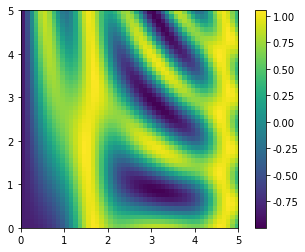

In [8]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

### 转置与换轴

In [ ]:
a = np.arange(15).reshape((3, 5))
print(a.T)

In [ ]:
b = a.T # 这里进行数据的拷贝了吗？

In [ ]:
a = np.random.randn(6, 3)
print(a)
np.dot(a.T, a)

In [ ]:
a = np.arange(2*2*4).reshape(2, 2, 4)
print(a)
b = a.transpose(1, 0, 2) # 这里进行数据的拷贝了吗？

In [11]:
print(a)
b = a.swapaxes(1, 2) # 这里进行数据的拷贝了吗？

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

**注：** 
1. `.T` 属性进行**转置**是一种特殊的**换轴**.
1. Numpy 尽量避免数据的拷贝, 很多时候我们得到的数组都是原始数组的**视图(view)**.
    + 视图数组和原始数组共享同一块内存
    + 修改视图数组的元素, 原始数组的相应元素也会改变

## 面向数组编程(array-oriented programming)

使用 Numpy 数组, 可以利用**简单的数组表达式**完成多种数据操作的任务, 而无需编写大量的循环. 这种利用简单数组表达式来替代**显式循环**的编程方法, 称为**面向数组编程**.

## Numpy 设计的一些基本原则

* 尽量避免复制数据
* 默认为**行优先(row-major)**存储
* 利用**广播(broadcast)**, 避免开辟新的内存
* 利用**面向数组编程(array-oriented programming)**方式提高运算效率.

**2019-10-17 作业：**

生成一个 $10^6$ 个 $ 3 \times 3 $ 矩阵， 计算矩阵的**行列式**和**逆**, 并用 `%timeit` 测试**逐个矩阵计算**和**面向数组计算**方式的时间差别。

* `np.linalg.inv`
* `np.linalg.det`

In [13]:
import numpy as np
a = np.random.rand(10, 3, 3)

array([ 0.07953293, -0.24510798, -0.02538085, -0.02465534,  0.02375505,
       -0.01905917,  0.371264  ,  0.06170646,  0.24312464,  0.52809351])